In [15]:
import json
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [16]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumBarunGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [23]:
with open('비건.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
vg = pd.DataFrame(json_data["data"])

with open('운동하는여자.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
eg = pd.DataFrame(json_data["data"])

with open('다이어트.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
diet = pd.DataFrame(json_data["data"])

with open('슈퍼말차클린.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
spc = pd.DataFrame(json_data["data"])

with open('건강스타그램.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
health = pd.DataFrame(json_data["data"])

with open('런스타그램.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
run = pd.DataFrame(json_data["data"])

with open('운동하는남자.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
eb = pd.DataFrame(json_data["data"])

with open('직장스타그램.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
work = pd.DataFrame(json_data["data"])

with open('피로회복.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
tired = pd.DataFrame(json_data["data"])

with open('헬스타그램.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
hs = pd.DataFrame(json_data["data"])

with open('야근중.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
yagun = pd.DataFrame(json_data["data"])

with open('저녁이있는삶.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
din = pd.DataFrame(json_data["data"])

with open('직장인.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
worker = pd.DataFrame(json_data["data"])

with open('퇴근각.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
gh = pd.DataFrame(json_data["data"])

with open('퇴근하고싶다.json', "r", encoding="utf-8") as f:
    json_data = json.load(f) 
rgh = pd.DataFrame(json_data["data"])

In [24]:
cb = [i for i in eg.Hashtags] + [i for i in eb.Hashtags] + [i for i in diet.Hashtags] + [i for i in hs.Hashtags] + [i for i in spc.Hashtags]

In [25]:
cd = [i for i in eg.Hashtags] + [i for i in vg.Hashtags] + [i for i in diet.Hashtags] + [i for i in spc.Hashtags] 

In [32]:
worker.head()

,index,post,hashtags_str,date,location,likes,hashtags
0,0,[캡쳐 잘 못 했는데 그냥 올려봄..],"['맞팔', '맞팔해요', '셀카', '일상', '일상스타그램', '인스타', '인...",[2020년 12월 6일],[],[176],"[맞팔, 맞팔해요, 셀카, 일상, 일상스타그램, 인스타, 인스타그램, 좋아요, 선팔..."
1,1,[🎅🏼 ⭐️ 🎄],[],[2020년 12월 6일],[],[241],[]
2,2,[할 수 없는 일이 많아진\n일상이 많이 속상한 요즘 🥺],"['첫줄', '일상', '데일리', '부산', '직장인', '인친', '아이폰', ...",[2020년 12월 6일],"[Busan 釜山, South Korea]",[153],"[첫줄, 일상, 데일리, 부산, 직장인, 인친, 아이폰, 소통, 팔로우, 팔로우반사..."
3,3,[한번두 못입구 나감☃️],[],[2020년 12월 6일],[],[280],[]
4,4,[내일 출근안할래ㅔㅔ...😩],"['카페', '94년생', '직장인', '27', '헬스', '헬스타그램', '운동...",[2020년 12월 6일],"[Daegu, South Korea]",[132],"[카페, 94년생, 직장인, 27, 헬스, 헬스타그램, 운동, 운동스타그램, 헬린이..."


In [48]:
ce = [i for i in tired.Hashtags] + [i for i in work.Hashtags] + [i for i in spc.Hashtags] + [i for i in yagun.Hashtags] + [i for i in din.Hashtags] + [i for i in worker.hashtags] + [i for i in gh.Hashtags] + [i for i in rgh.Hashtags]

# - B그룹

In [34]:
stop_words = ['맞팔' , '커피', 'cafe', 'coffee', '운동맞팔',
              '카페', '좋아요', '맞팔', '소통', '좋아요반사', 
              '팔로우', '좋반', 'e', 'r', 'o', '선팔하면맞팔',
              '좋반', '선팔', 'f4f', 'fff', 'likeforlikes', '운동소통','선팔', '좋팔', '부산','ootd',
              '서울','인친','오오티디'] 
instagram_tags = [[word for word in s if word not in stop_words] for s in cb]
instagram_tags[0]

['데일리',
 '일상',
 '셀스타그램',
 '셀카',
 '댓글',
 '패션',
 '훈남훈녀',
 '훈남',
 '선팔맞팔',
 '운동하는여자',
 '훈녀',
 '팔로워',
 '팔로우미',
 '맞팔해요',
 '인친환영',
 '아이폰',
 '데일리룩',
 '남자데일리룩',
 '여자데일리룩',
 '오늘의훈남',
 '오늘의훈녀',
 '인스타데일리']

In [35]:
import networkx as nx
from apyori import apriori

In [36]:
result = (list(apriori(instagram_tags, min_support = 0.01, min_length = 2)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
       (df['support'] >= 0.01)].sort_values(by = 'support', ascending = False)
df

KeyboardInterrupt: 

In [27]:
G = nx.Graph()
ar = (df['items']);G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize - min(nsize))/(max(nsize) - min(nsize))
pos = nx.random_layout(G)

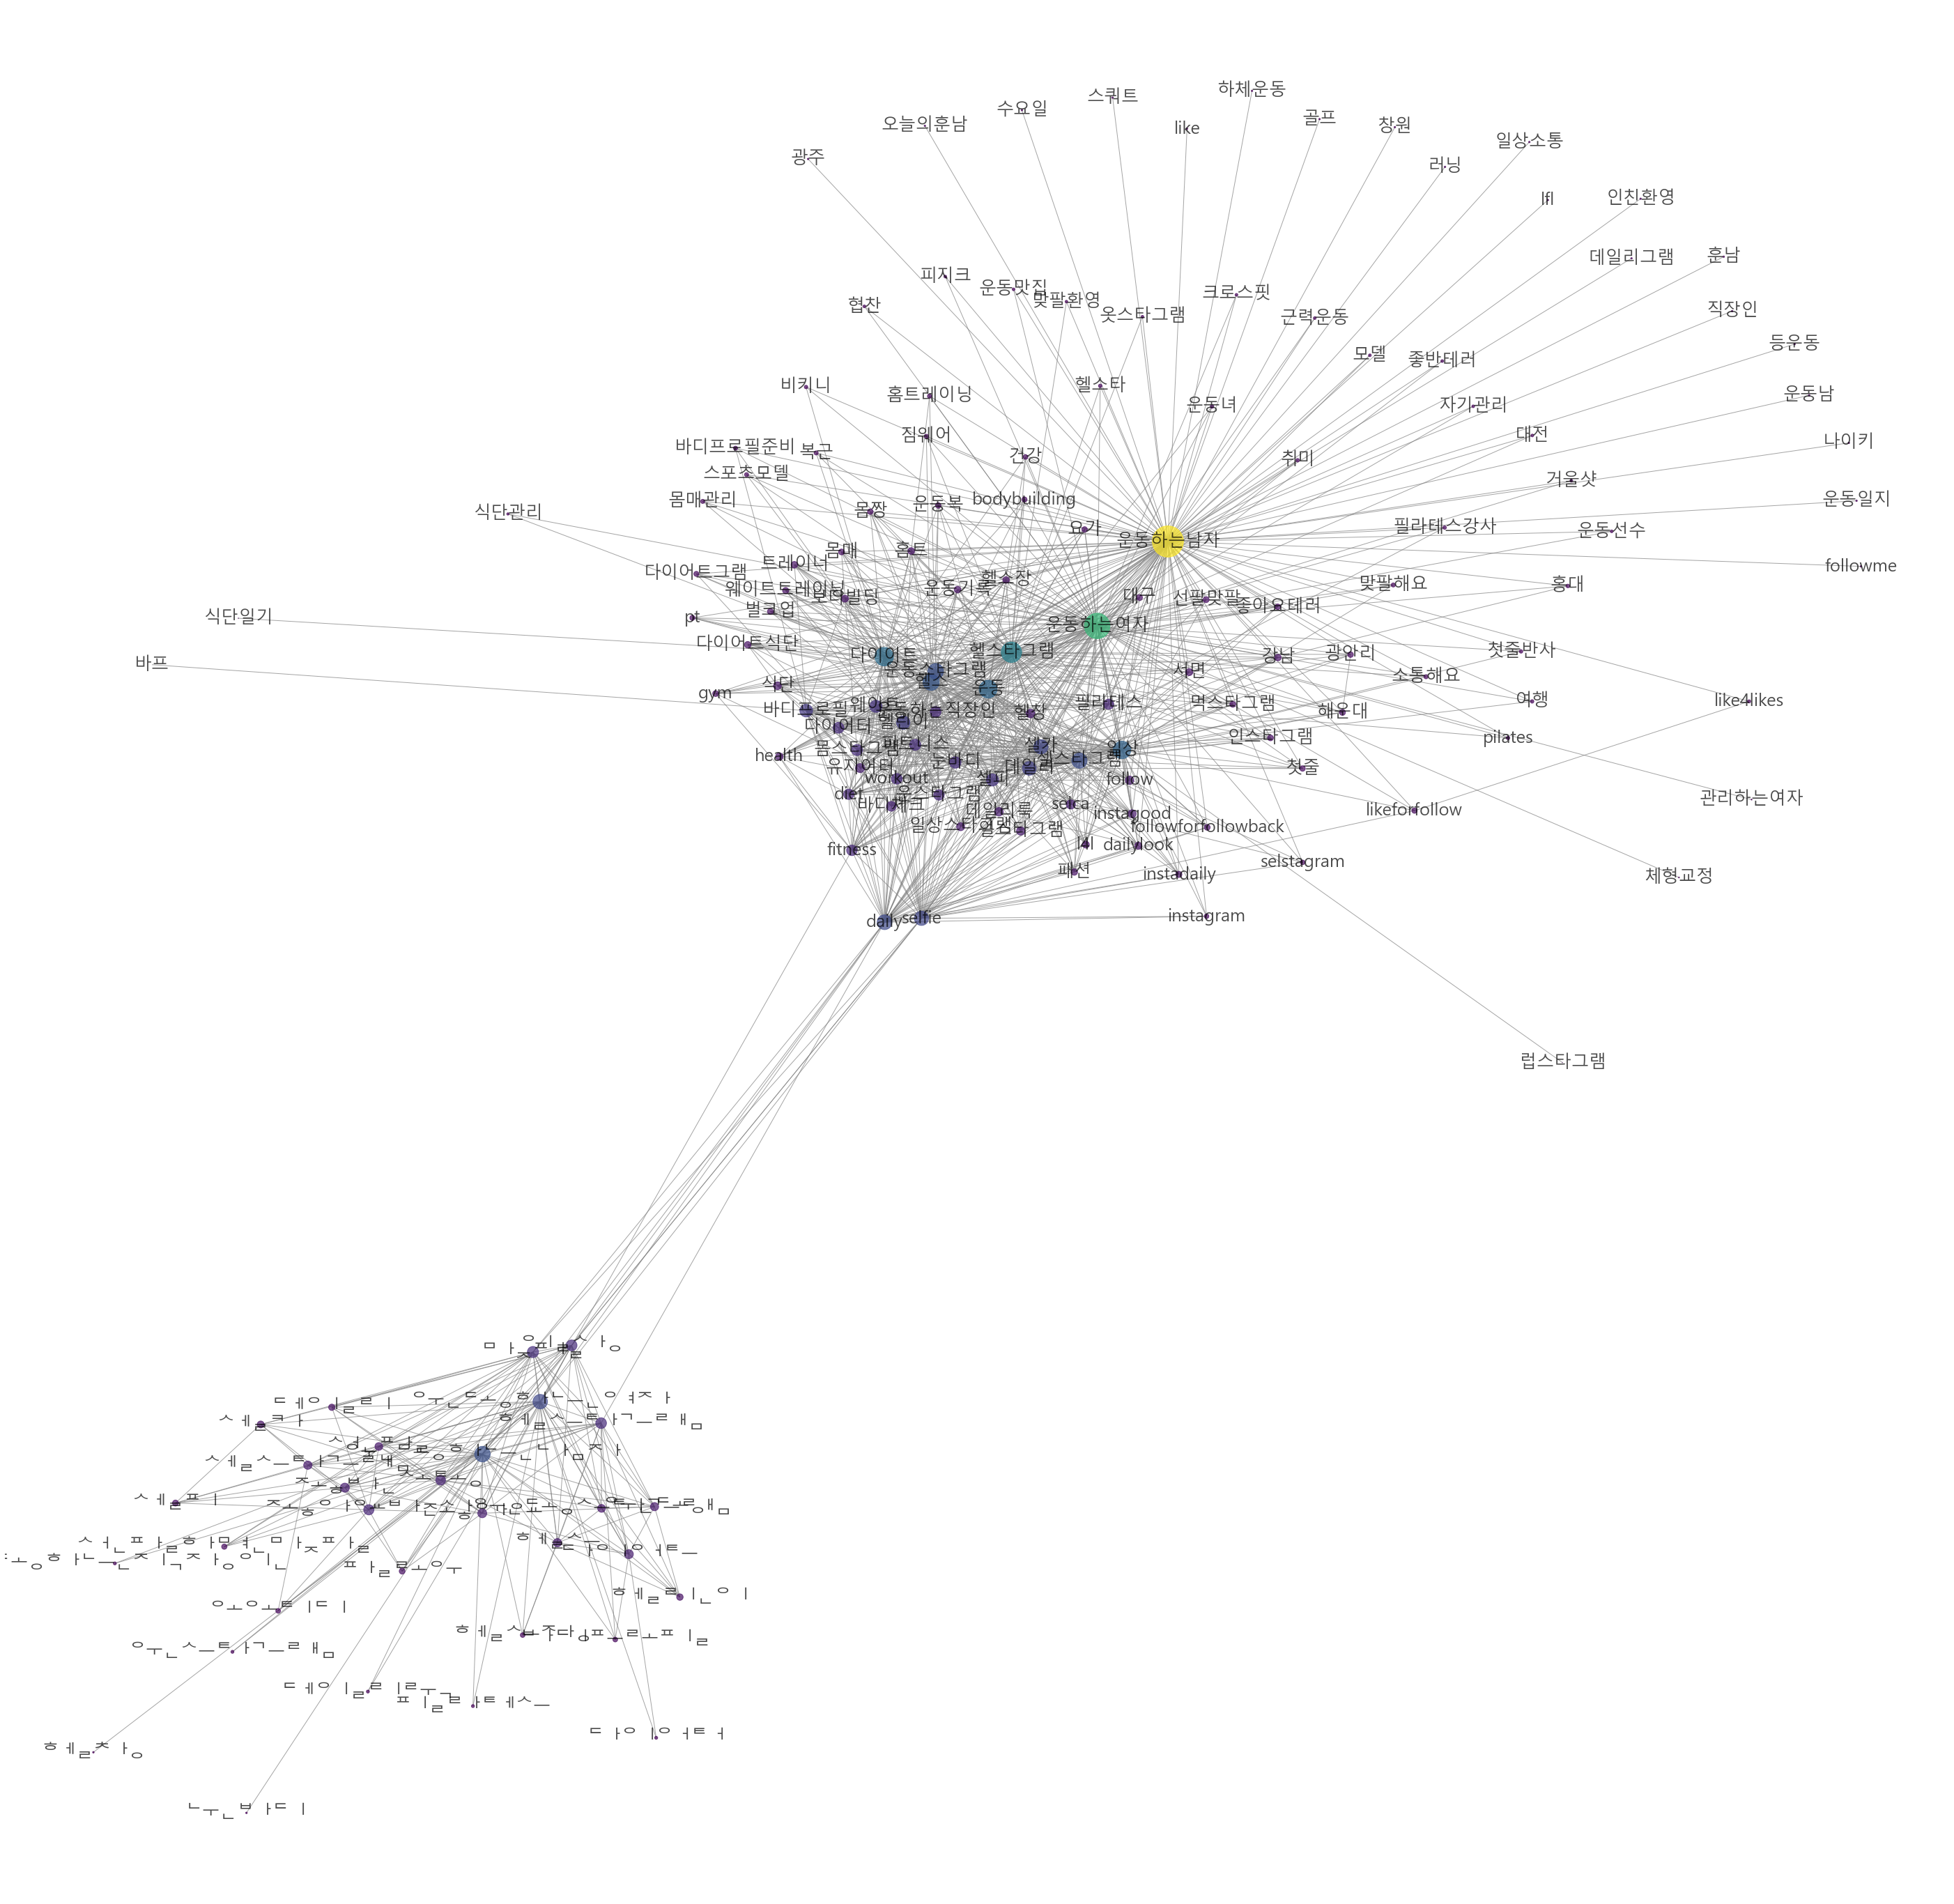

In [28]:
plt.figure(figsize = (50,50));plt.axis('off')
nx.draw_networkx(G, font_size = 25, font_family = font_name, node_color = list(pr.values()),
                alpha = 0.7, edge_color = '.5', node_size = nsize,
                style = 'solid')
plt.savefig('wadiz_network.png', bbox_inches = 'tight')

# - D그룹

In [29]:
stop_words = ['맞팔' , '커피', 'cafe', 'coffee', '운동맞팔',
              '카페', '좋아요', '맞팔', '소통', '좋아요반사', 
              '팔로우', '좋반', 'e', 'r', 'o', '선팔하면맞팔',
              '좋반', '선팔', 'f4f', 'fff', 'likeforlikes', '운동소통','선팔', '좋팔', '부산','ootd',
              '서울','인친','오오티디'] 
instagram_tags = [[word for word in s if word not in stop_words] for s in cd]
instagram_tags[0]

['데일리',
 '일상',
 '셀스타그램',
 '셀카',
 '댓글',
 '패션',
 '훈남훈녀',
 '훈남',
 '선팔맞팔',
 '운동하는여자',
 '훈녀',
 '팔로워',
 '팔로우미',
 '맞팔해요',
 '인친환영',
 '아이폰',
 '데일리룩',
 '남자데일리룩',
 '여자데일리룩',
 '오늘의훈남',
 '오늘의훈녀',
 '인스타데일리']

In [34]:
result = (list(apriori(instagram_tags, min_support = 0.015, min_length = 2)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
       (df['support'] >= 0.01)].sort_values(by = 'support', ascending = False)
df

,items,support,ordered_statistics,length
203,"(운동하는여자, 다이어트)",0.092384,"[((), (운동하는여자, 다이어트), 0.09238424924275206, 1.0...",2
327,"(운동하는여자, 운동하는남자)",0.092168,"[((), (운동하는여자, 운동하는남자), 0.09216789268714842, 1...",2
143,"(vegan, 비건)",0.089572,"[((), (vegan, 비건), 0.08957161401990481, 1.0), ...",2
274,"(비건, 채식)",0.087192,"[((), (비건, 채식), 0.08719169190826483, 1.0), ((비...",2
315,"(운동하는여자, 운동)",0.079186,"[((), (운동하는여자, 운동), 0.07918649935093033, 1.0),...",2
...,...,...,...,...
204,"(다이어트, 운스타그램)",0.015145,"[((), (다이어트, 운스타그램), 0.015144958892254435, 1.0...",2
161,"(눈바디, 운동하는남자)",0.015145,"[((), (눈바디, 운동하는남자), 0.015144958892254435, 1.0...",2
156,"(좋아요, 좋아요반사)",0.015145,"[((), (좋아요, 좋아요반사), 0.0151449588922...",2
253,"(비건, 비건디저트)",0.015145,"[((), (비건, 비건디저트), 0.015144958892254435, 1.0),...",2


In [35]:
G = nx.Graph()
ar = (df['items']);G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize - min(nsize))/(max(nsize) - min(nsize))
pos = nx.random_layout(G)

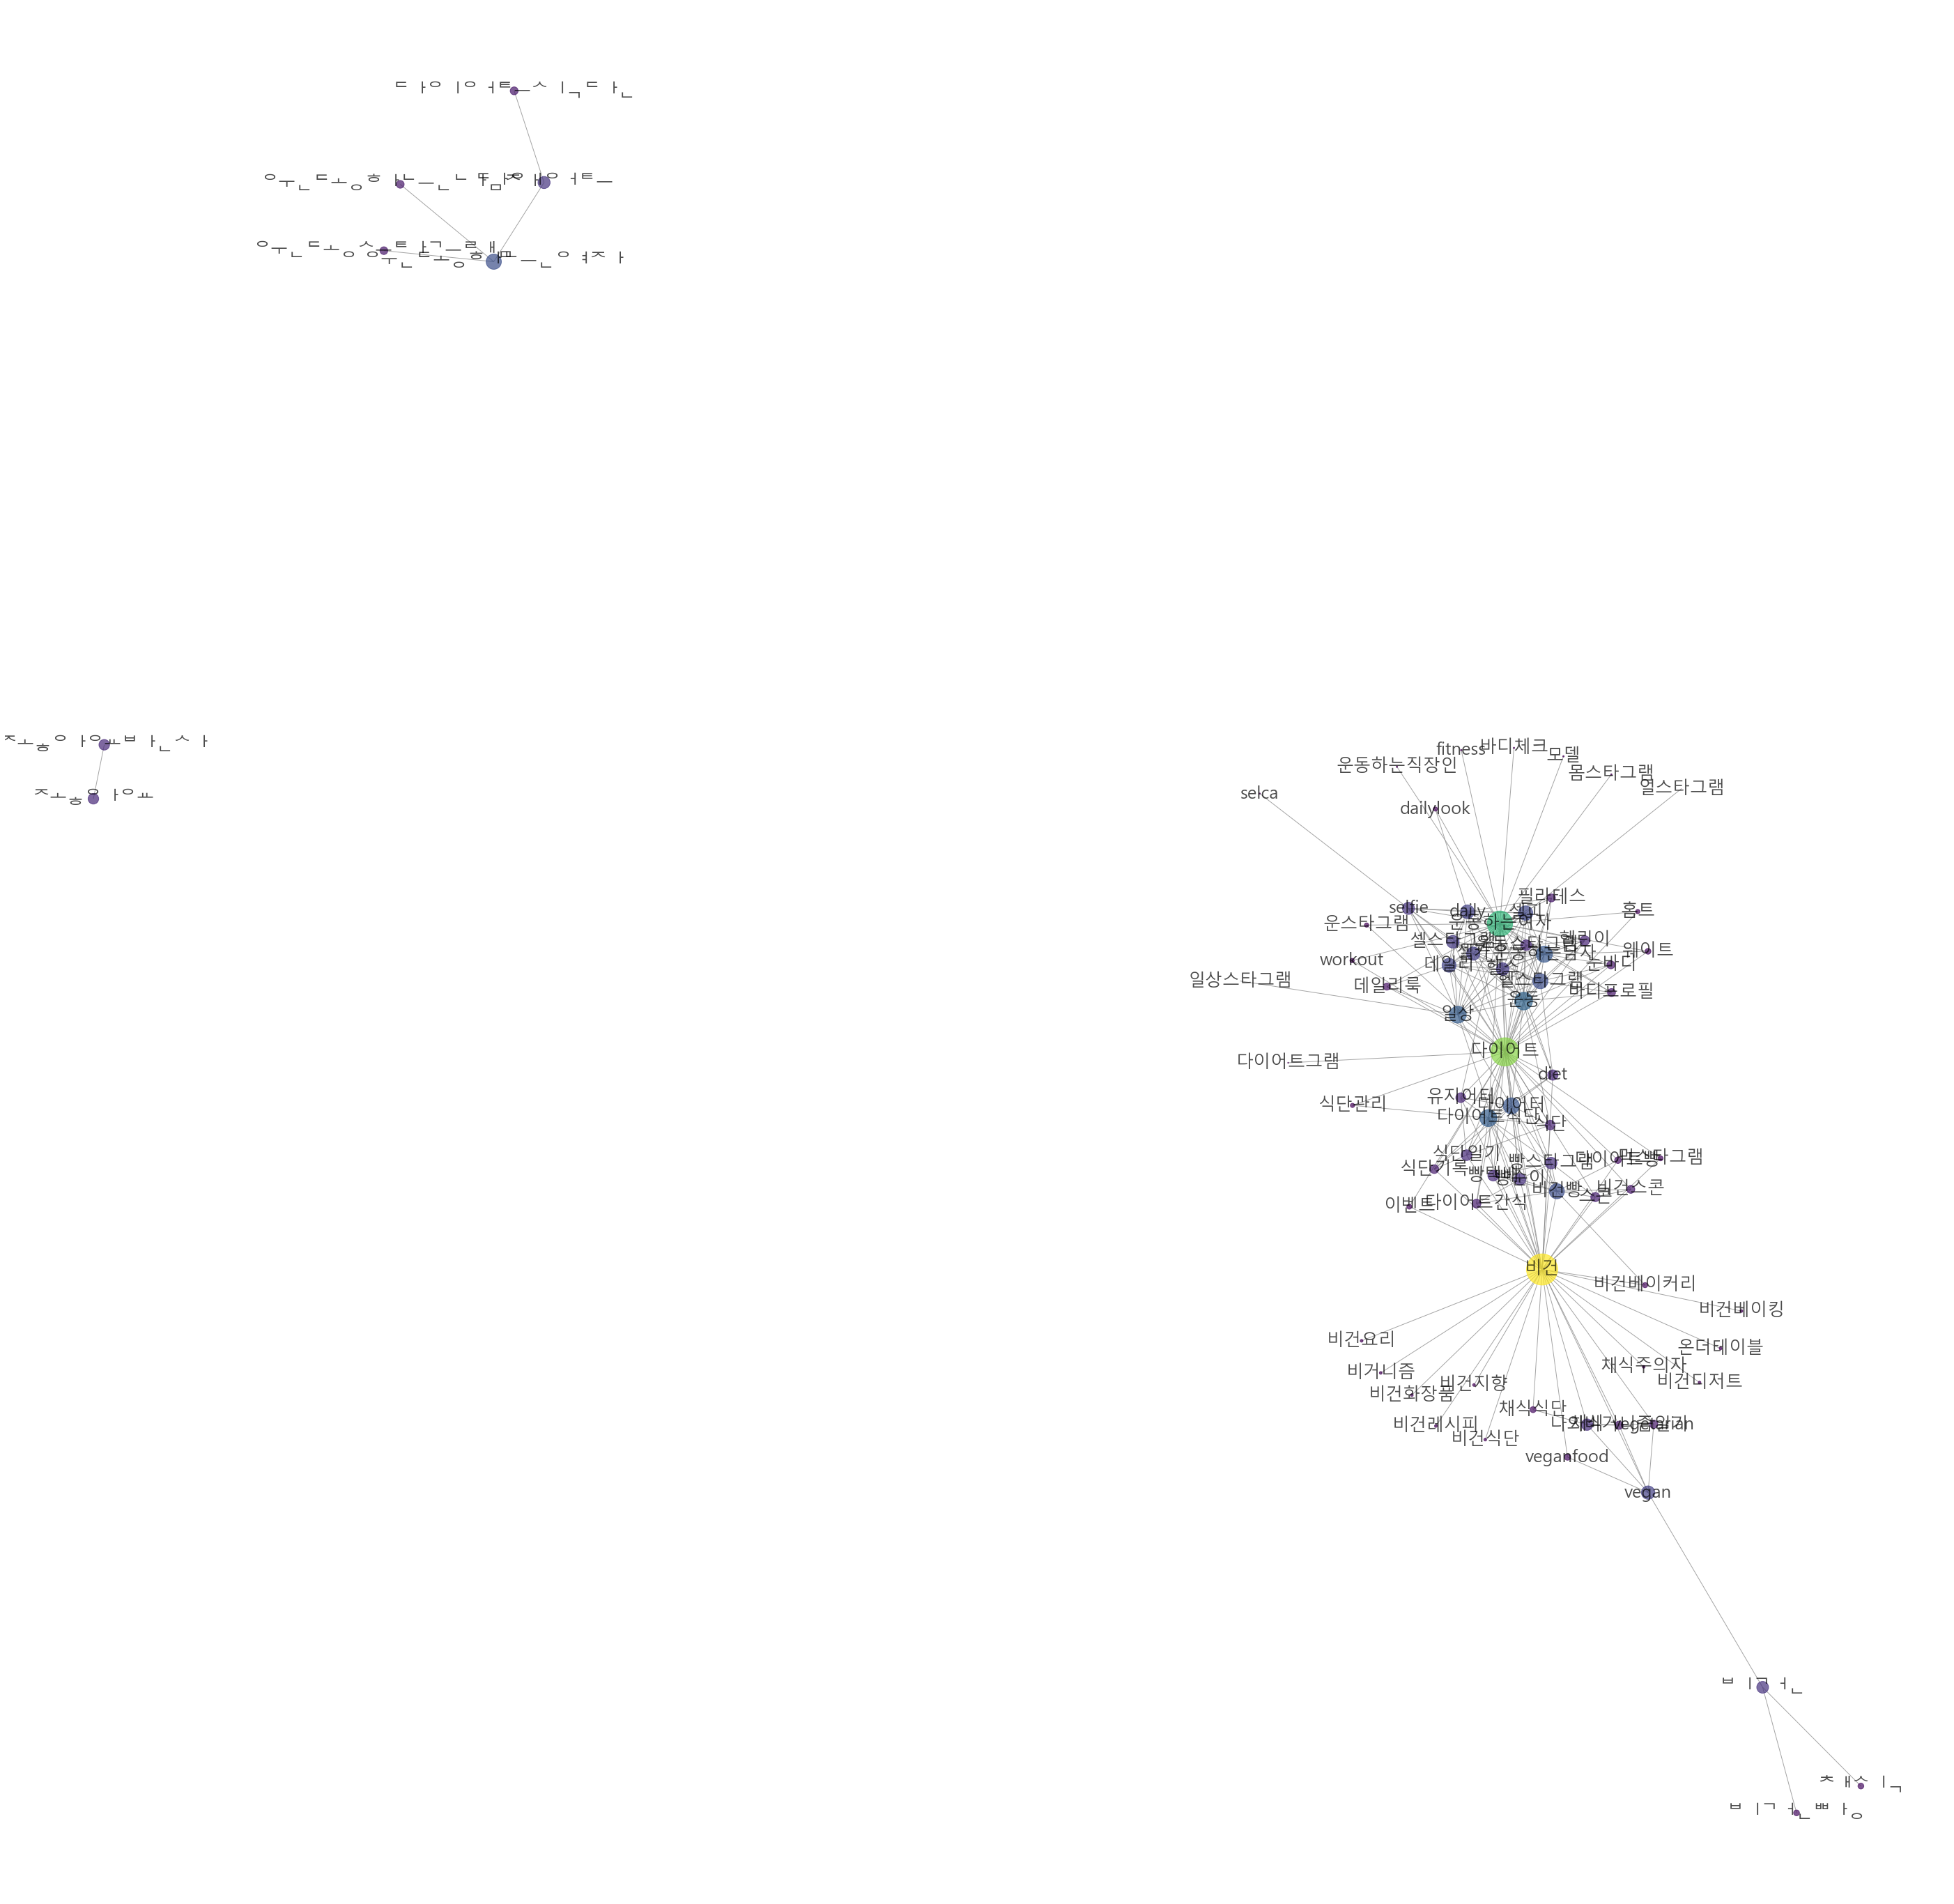

In [36]:
plt.figure(figsize = (50,50));plt.axis('off')
nx.draw_networkx(G, font_size = 25, font_family = font_name, node_color = list(pr.values()),
                alpha = 0.7, edge_color = '.5', node_size = nsize,
                style = 'solid')
plt.savefig('wadiz_network.png', bbox_inches = 'tight')

# - E그룹

In [49]:
stop_words = ['맞팔' , '커피', 'cafe', 'coffee', '운동맞팔',
              '카페', '좋아요', '맞팔', '소통', '좋아요반사', 
              '팔로우', '좋반', 'e', 'r', 'o', '선팔하면맞팔',
              '좋반', '선팔', 'f4f', 'fff', 'likeforlikes', '운동소통','선팔', '좋팔', '부산','ootd',
              '서울','인친','오오티디'] 
instagram_tags = [[word for word in s if word not in stop_words] for s in ce]
instagram_tags[0]

['눈마사지기',
 '피로회복',
 '셀카',
 '오늘의훈녀',
 '일요일',
 '주말끝',
 '웃음가득',
 '행복만땅',
 '22살',
 '99년생',
 '20대',
 '주말일상',
 '주말나들이',
 '댓글',
 '답방100',
 '맞팔100',
 '11월끝자락',
 '데일리템',
 '직장인',
 '직딩',
 '출근룩',
 '출근길',
 '목폴라',
 '친스타그램',
 '우정해']

In [57]:
%%time
result = (list(apriori(instagram_tags, min_support = 0.018, min_length = 2)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
       (df['support'] >= 0.01)].sort_values(by = 'support', ascending = False)
df

KeyboardInterrupt: 

In [55]:
G = nx.Graph()
ar = (df['items']);G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize - min(nsize))/(max(nsize) - min(nsize))
pos = nx.random_layout(G)

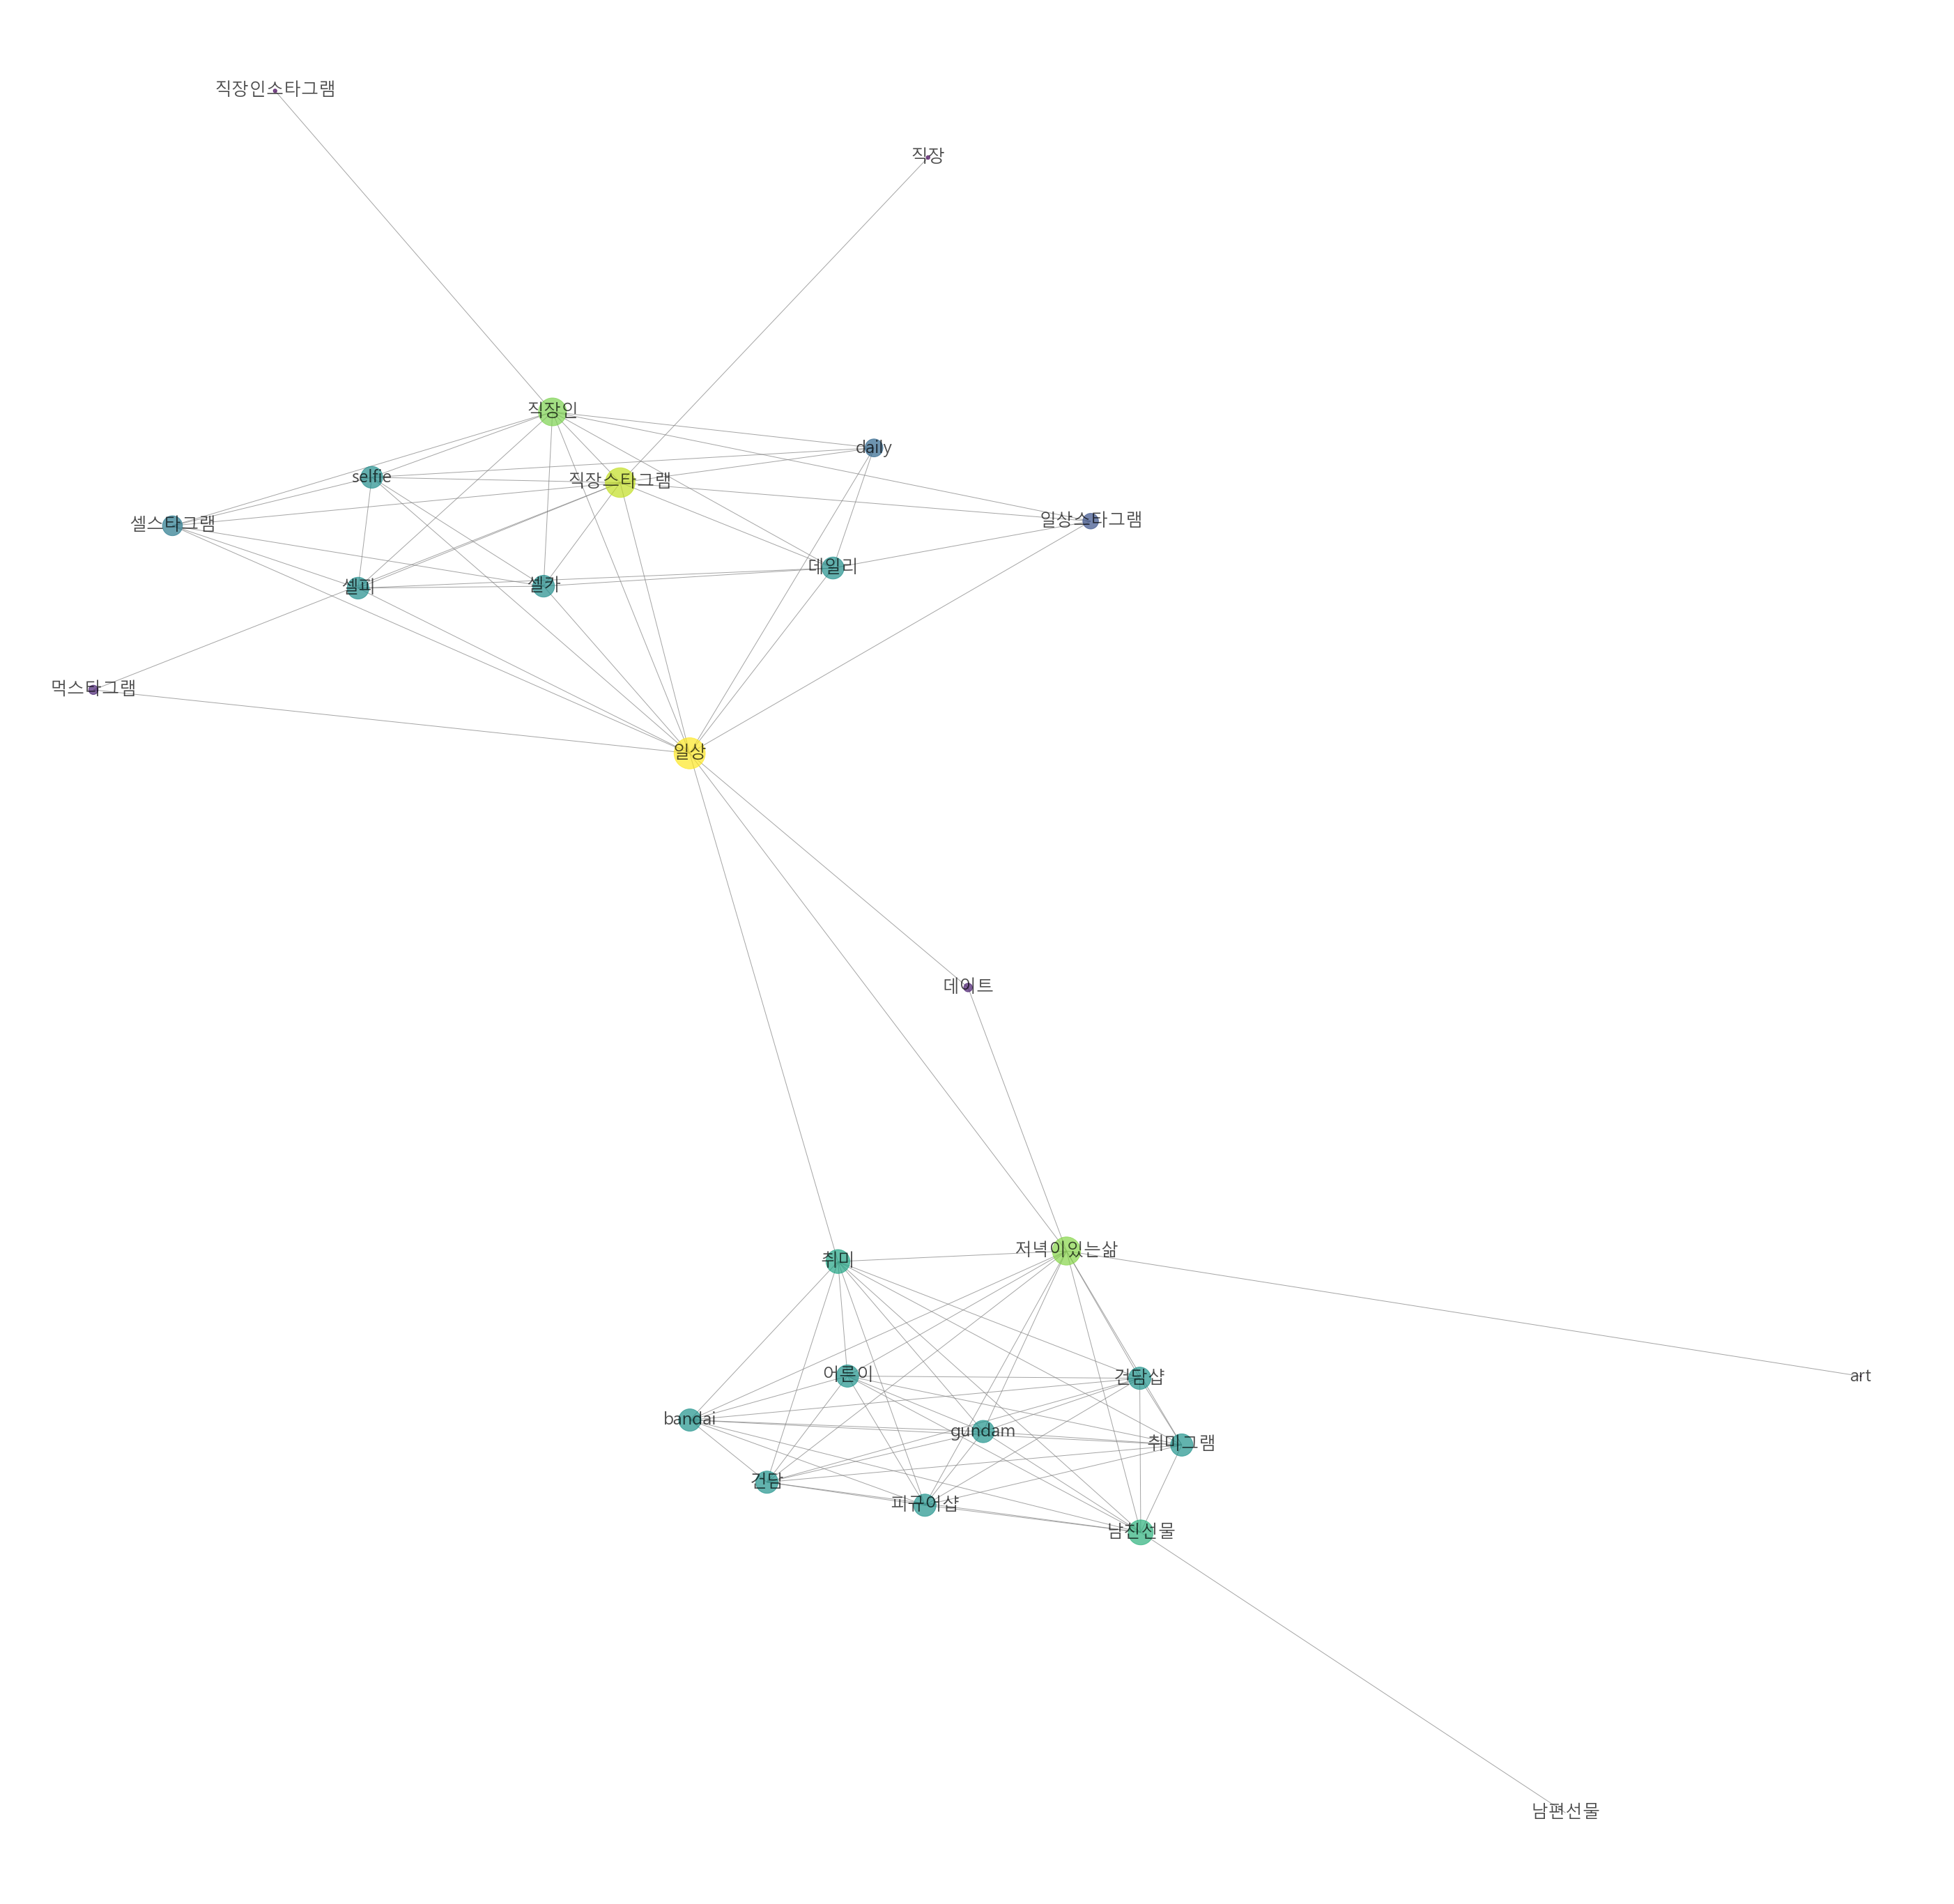

In [56]:
plt.figure(figsize = (50,50));plt.axis('off')
nx.draw_networkx(G, font_size = 25, font_family = font_name, node_color = list(pr.values()),
                alpha = 0.7, edge_color = '.5', node_size = nsize,
                style = 'solid')
plt.savefig('wadiz_network.png', bbox_inches = 'tight')